In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [22]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [23]:
train.head()

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Af04604195,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
1,Af04794049,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
2,Af07527693,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
3,Af11267444,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
4,Af12688448,Afghanistan,2005,Developing,57.3,291.0,85,0.02,1.388648,66.0,...,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9


In [24]:
train.shape

(2350, 23)

In [25]:
train.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2350.000000,2350.000000,2342.000000,2350.000000,2192.000000,2350.000000,1911.000000,2350.000000,2323.000000,2350.000000,2336.000000,2165.000000,2336.000000,2350.000000,2005.000000,1.834000e+03,2323.000000,2323.000000,2219.000000,2221.000000
mean,2007.537447,69.275404,165.824082,28.793191,4.593271,720.521353,81.141811,2318.703404,38.556780,40.094468,82.693921,5.936185,82.376712,1.787064,7384.623471,1.192254e+07,4.800215,4.838269,0.631084,12.028140
std,4.611986,9.573065,125.273598,111.836006,4.034828,1952.616462,24.821252,11589.618520,20.073857,152.939537,23.363327,2.509597,23.793441,5.266324,14189.942344,5.480387e+07,4.403585,4.482891,0.207573,3.346762
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.300000,74.000000,0.000000,0.850000,5.491010,77.000000,0.000000,19.400000,0.000000,78.000000,4.260000,78.000000,0.100000,462.517913,1.943552e+05,1.600000,1.500000,0.497000,10.100000
50%,2008.000000,72.200000,144.000000,3.000000,3.760000,65.611455,92.000000,16.000000,43.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1774.929100,1.416448e+06,3.300000,3.300000,0.682000,12.400000
75%,2012.000000,75.700000,227.750000,20.750000,7.622500,441.534144,97.000000,356.250000,56.200000,26.000000,97.000000,7.500000,97.000000,0.800000,5859.915622,7.442611e+06,7.100000,7.100000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [26]:
test.head()

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Sy75324907,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
1,Cr10129453,Croatia,2006,Developed,113.0,0,11.83,1555.651986,NaN,1,...,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
2,Mo67025598,Montenegro,2007,Developing,125.0,0,4.98,678.518894,9.0,0,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
3,Ba38246112,Bahrain,2014,Developing,7.0,0,1.57,367.255674,98.0,46,...,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,6.0,0.820,14.5
4,Ke57254548,Kenya,2000,Developing,428.0,77,1.51,0.681686,NaN,21002,...,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4


In [27]:
test.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,588.000000,586.000000,588.000000,552.000000,588.000000,474.000000,588.000000,581.000000,588.000000,583.000000,547.000000,583.000000,588.000000,485.000000,4.520000e+02,581.00000,581.000000,552.000000,554.000000
mean,2007.443878,160.689420,36.341837,4.640942,809.110761,80.128692,2822.804422,37.379518,49.794218,81.974271,5.946124,82.113208,1.562415,7890.504183,1.612449e+07,4.99759,4.998451,0.613348,11.851083
std,4.624420,120.306158,139.587066,4.124987,2123.408651,26.060068,10964.956359,19.913699,187.414890,23.697065,2.455425,23.426808,4.240632,14604.993842,8.147891e+07,4.48635,4.613042,0.223427,3.406595
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,3.685949,3.600000e+01,0.10000,0.100000,0.000000,0.000000
25%,2003.000000,69.000000,0.000000,0.950000,2.717652,76.000000,0.000000,18.800000,0.000000,77.000000,4.290000,77.000000,0.100000,465.119887,2.231182e+05,1.60000,1.500000,0.483750,9.900000
50%,2007.000000,141.000000,3.000000,3.725000,62.695106,92.000000,17.500000,41.400000,4.000000,93.000000,5.800000,93.000000,0.100000,1741.142552,1.323676e+06,3.50000,3.500000,0.656500,12.100000
75%,2011.000000,227.750000,26.250000,7.977500,432.321465,97.000000,372.750000,56.000000,36.250000,97.000000,7.465000,97.000000,0.800000,6256.559260,7.245294e+06,7.50000,7.400000,0.778500,14.175000
max,2015.000000,715.000000,1800.000000,17.870000,19479.911610,99.000000,131441.000000,79.300000,2400.000000,99.000000,17.600000,99.000000,43.500000,119172.741800,1.161978e+09,27.50000,28.500000,0.942000,20.600000


In [28]:
test.shape

(588, 22)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2350 non-null   object 
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Life expectancy                  2350 non-null   float64
 5   Adult Mortality                  2342 non-null   float64
 6   infant deaths                    2350 non-null   int64  
 7   Alcohol                          2192 non-null   float64
 8   percentage expenditure           2350 non-null   float64
 9   Hepatitis B                      1911 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2323 non-null   float64
 12  under-five deaths   

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               588 non-null    object 
 1   Country                          588 non-null    object 
 2   Year                             588 non-null    int64  
 3   Status                           588 non-null    object 
 4   Adult Mortality                  586 non-null    float64
 5   infant deaths                    588 non-null    int64  
 6   Alcohol                          552 non-null    float64
 7   percentage expenditure           588 non-null    float64
 8   Hepatitis B                      474 non-null    float64
 9   Measles                          588 non-null    int64  
 10  BMI                              581 non-null    float64
 11  under-five deaths                588 non-null    int64  
 12  Polio                 

In [33]:
sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

,ID,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2346,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2347,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
LifeExpectancy = data["Life expectancy"]

In [35]:
LifeExpectancy.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      0
1      0
2      0
3      0
4      0
      ..
583    0
584    0
585    0
586    0
587    0
Name: Life expectancy, Length: 588, dtype: int64>

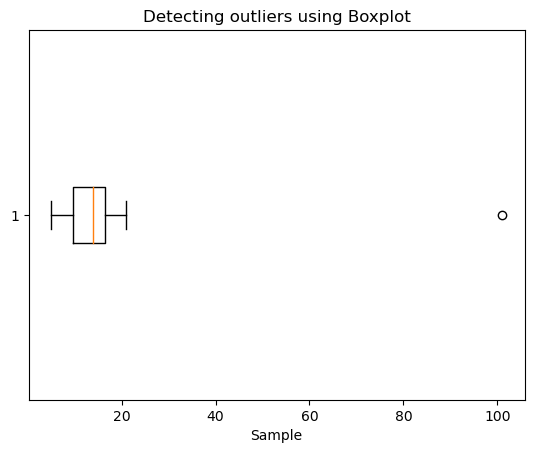

In [2]:
import matplotlib.pyplot as plt
sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()